In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e13/train.csv')
train_df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [4]:
train_df['prognosis'][:10]

0         Lyme_disease
1            Tungiasis
2         Lyme_disease
3                 Zika
4    Rift_Valley_fever
5         Lyme_disease
6      West_Nile_fever
7            Tungiasis
8              Malaria
9          Chikungunya
Name: prognosis, dtype: object

In [5]:
enc = OrdinalEncoder()
train_df['prognosis'] = enc.fit_transform(train_df[['prognosis']])
train_df['prognosis'][:10]

0     3.0
1     7.0
2     3.0
3    10.0
4     6.0
5     3.0
6     8.0
7     7.0
8     4.0
9     0.0
Name: prognosis, dtype: float64

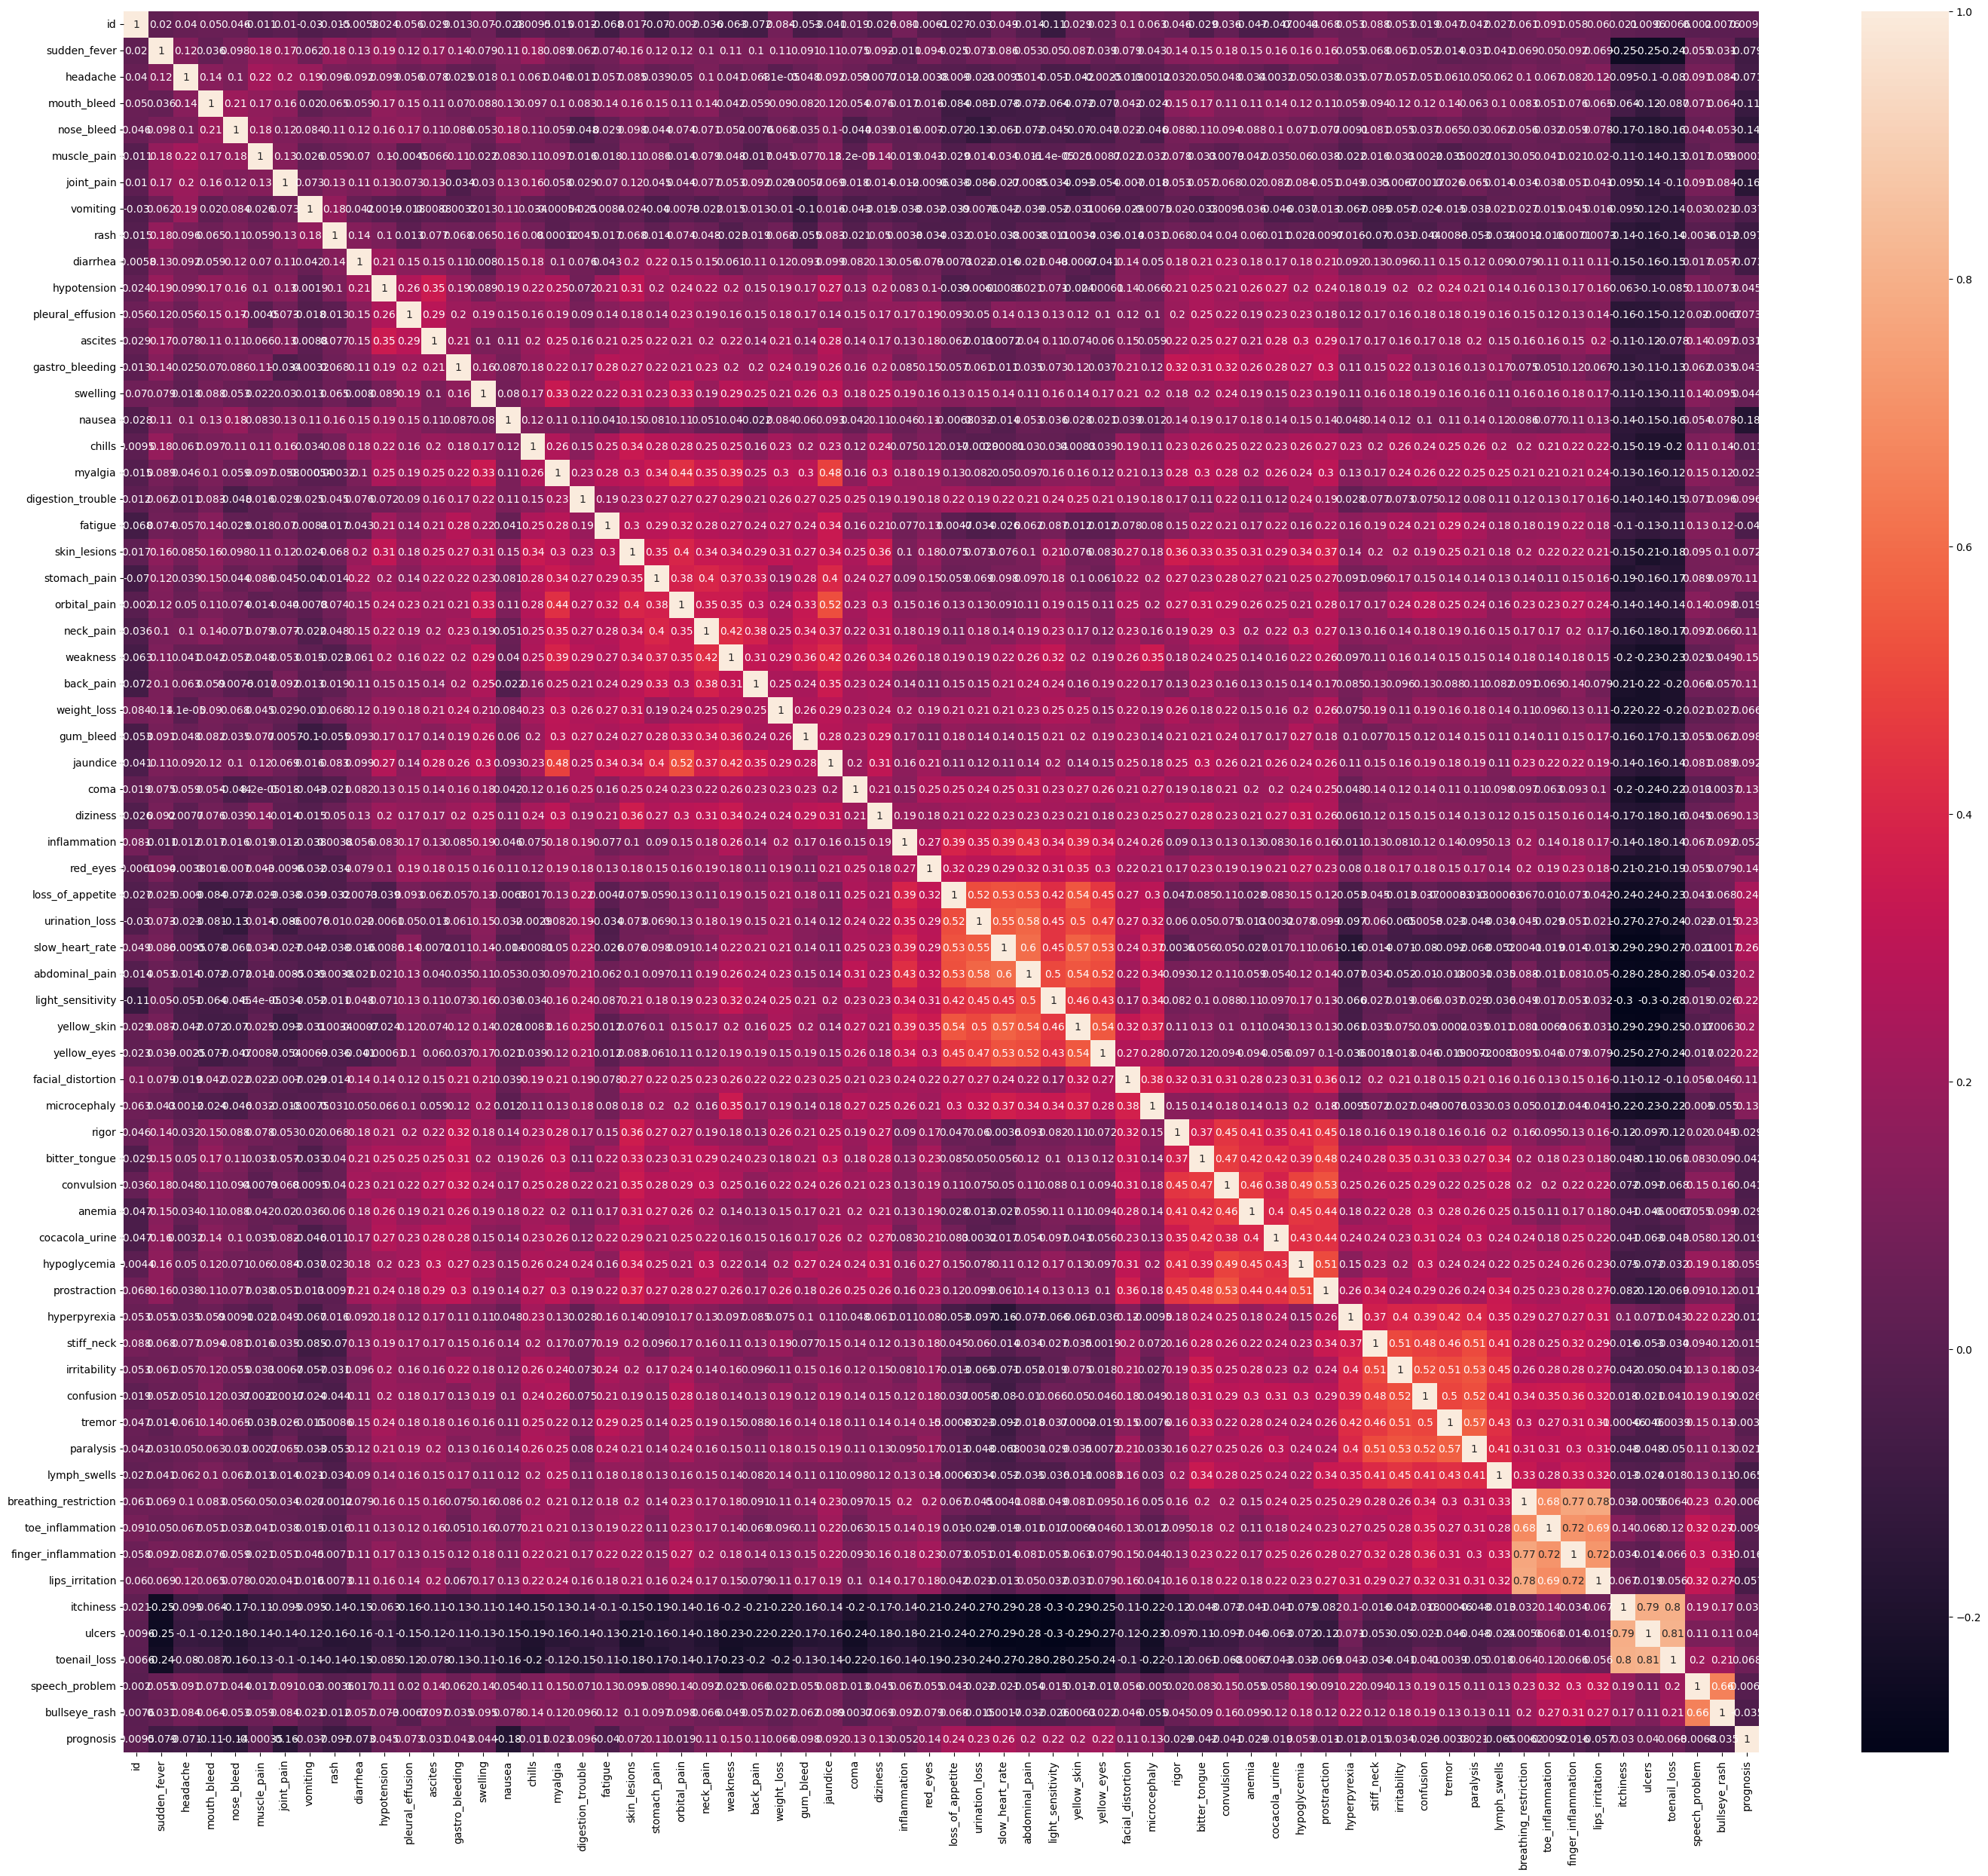

In [6]:
corr = train_df.corr()
plt.figure(figsize=(35,30))
sns.heatmap(corr,annot=True)
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('prognosis', axis=1), train_df['prognosis'], random_state=42)

In [8]:
X_train.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
371,371,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,176,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
494,494,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,215,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
569,569,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_test.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
479,479,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,81,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
77,77,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
208,208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
319,319,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
y_train.head()

371    4.0
176    4.0
494    6.0
215    7.0
569    6.0
Name: prognosis, dtype: float64

In [11]:
y_test.head()

479    1.0
81     8.0
77     8.0
208    2.0
319    6.0
Name: prognosis, dtype: float64

In [12]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
predictions = lr_clf.predict_proba(X_test)

In [14]:
print("Output of predict_proba:")
print(predictions[0])

Output of predict_proba:
[0.12681672 0.1958262  0.28140433 0.04834938 0.07772    0.02590886
 0.06871412 0.04280739 0.05009817 0.04869181 0.03366302]


In [15]:
# We can get the indices of the highest probabilities with argsort
sorted_prediction_ids = np.argsort(-predictions[0]) # Note argsort sorts in ascending order, but by making all our values negative we'll end up with the highest probabilities first
print("Indices sorted by probabilities:")
print(sorted_prediction_ids)
# 2 is our first id, and the probability at index 2 from predictions[0] is the highest (0.28140433)

Indices sorted by probabilities:
[ 2  1  0  4  6  8  9  3  7 10  5]


In [16]:
# We can grab the top 3 predictions and then use our encoder to turn them back into string labels
top_3_prediction_ids = sorted_prediction_ids[:3]
top_3_predictions = enc.inverse_transform(top_3_prediction_ids.reshape(-1, 1)) # inverse_transform expects a 2D array, so we reshape our vector (but this won't be necessary when we run on multiple predictions at once)
top_3_predictions
# We got a list of 3 predictions! Great!

array([['Japanese_encephalitis'],
       ['Dengue'],
       ['Chikungunya']], dtype=object)

In [17]:
# Now let's look at doing the above for a whole set of predictions at once:
sorted_prediction_ids = np.argsort(-predictions, axis=1)
top_3_prediction_ids = sorted_prediction_ids[:,:3]

# Because enc.inverse_transform expects a specific shape (a 2D array with 1 column) we can save the original shape to reshape to after decoding
original_shape = top_3_prediction_ids.shape
top_3_predictions = enc.inverse_transform(top_3_prediction_ids.reshape(-1, 1))
top_3_predictions = top_3_predictions.reshape(original_shape)
top_3_predictions[:10] # Spot check our first 10 values

array([['Japanese_encephalitis', 'Dengue', 'Chikungunya'],
       ['Dengue', 'West_Nile_fever', 'Rift_Valley_fever'],
       ['Rift_Valley_fever', 'Dengue', 'West_Nile_fever'],
       ['Zika', 'Yellow_Fever', 'Japanese_encephalitis'],
       ['Chikungunya', 'Tungiasis', 'Dengue'],
       ['Tungiasis', 'Dengue', 'Rift_Valley_fever'],
       ['West_Nile_fever', 'Plague', 'Zika'],
       ['Rift_Valley_fever', 'West_Nile_fever', 'Japanese_encephalitis'],
       ['Dengue', 'Chikungunya', 'Rift_Valley_fever'],
       ['Zika', 'Yellow_Fever', 'Plague']], dtype=object)

In [18]:
# Sourced from the ml_metrics package at https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/average_precision.py
import numpy as np

def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [19]:
# Our MAP@K score here is ~0.3456
mapk(y_test.values.reshape(-1, 1), top_3_prediction_ids, k=3)

0.34557438794726925

In [20]:
test_df = pd.read_csv('/kaggle/input/playground-series-s3e13/test.csv')
test_df.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,...,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Make predictions
predictions = lr_clf.predict_proba(test_df)

# Get the sorted indices of predictions and take the top 3
sorted_prediction_ids = np.argsort(-predictions, axis=1)
top_3_prediction_ids = sorted_prediction_ids[:,:3]

# Because enc.inverse_transform expects a specific shape (a 2D array with 1 column) we can save the original shape to reshape to after decoding
original_shape = top_3_prediction_ids.shape
top_3_predictions = enc.inverse_transform(top_3_prediction_ids.reshape(-1, 1))
top_3_predictions = top_3_predictions.reshape(original_shape)
top_3_predictions[:10] # Spot check our first 10 values

array([['Tungiasis', 'Rift_Valley_fever', 'West_Nile_fever'],
       ['Chikungunya', 'Dengue', 'Malaria'],
       ['West_Nile_fever', 'Japanese_encephalitis', 'Tungiasis'],
       ['Japanese_encephalitis', 'Tungiasis', 'Rift_Valley_fever'],
       ['West_Nile_fever', 'Japanese_encephalitis', 'Plague'],
       ['Zika', 'Yellow_Fever', 'Plague'],
       ['Japanese_encephalitis', 'Yellow_Fever', 'Malaria'],
       ['Tungiasis', 'Dengue', 'West_Nile_fever'],
       ['Yellow_Fever', 'Zika', 'Japanese_encephalitis'],
       ['Yellow_Fever', 'Plague', 'Zika']], dtype=object)

In [22]:
# Now to get our array of labels into a single column for our submission we can just join on on a space across axis 1
test_df['prognosis'] = np.apply_along_axis(lambda x: np.array(' '.join(x), dtype="object"), 1, top_3_predictions)
test_df['prognosis'][:10] # Spot check our first 10 values

0          Tungiasis Rift_Valley_fever West_Nile_fever
1                           Chikungunya Dengue Malaria
2      West_Nile_fever Japanese_encephalitis Tungiasis
3    Japanese_encephalitis Tungiasis Rift_Valley_fever
4         West_Nile_fever Japanese_encephalitis Plague
5                             Zika Yellow_Fever Plague
6           Japanese_encephalitis Yellow_Fever Malaria
7                     Tungiasis Dengue West_Nile_fever
8              Yellow_Fever Zika Japanese_encephalitis
9                             Yellow_Fever Plague Zika
Name: prognosis, dtype: object

In [23]:
test_df.to_csv('submission.csv', columns=['id', 'prognosis'], index=False)